<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from itertools import cycle, islice
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score

In [27]:
# Створення синтетичного набору даних (make_blobs)
X_synthetic, y_synthetic = datasets.make_blobs(n_samples=1500, random_state=8)

# Створення реального набору даних за якістю вина
wine = datasets.load_wine()
X_wine, y_wine = wine.data, wine.target

# Нормалізація даних
X_synthetic = StandardScaler().fit_transform(X_synthetic)
X_wine = StandardScaler().fit_transform(X_wine)

# Створення об'єктів кластеризації
ward = cluster.AgglomerativeClustering(n_clusters=3, linkage="ward")
complete = cluster.AgglomerativeClustering(n_clusters=3, linkage="complete")
average = cluster.AgglomerativeClustering(n_clusters=3, linkage="average")
single = cluster.AgglomerativeClustering(n_clusters=3, linkage="single")

# Список алгоритмів для кластеризації
clustering_algorithms = [
    ("Single Linkage", single),
    ("Average Linkage", average),
    ("Complete Linkage", complete),
    ("Ward Linkage", ward),
]

In [28]:
random_state = 170
X_aniso, y_aniso = datasets.make_blobs(n_samples=1500, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_aniso, transformation)
aniso = (X_aniso, y_aniso)

# Блоби з різноманітними варіаціями
varied = datasets.make_blobs(
    n_samples=1500, cluster_std=[1.1, 2.6, 0.6], random_state=random_state
)

# Налаштування параметрів кластера
plt.figure(figsize=(14, 10))
plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (X_synthetic, y_synthetic, "Synthetic Data"),
    (X_aniso, y_aniso, "Anisotropic Data"),
    (varied[0], varied[1], "Varied Data"),
]

<Figure size 1400x1000 with 0 Axes>

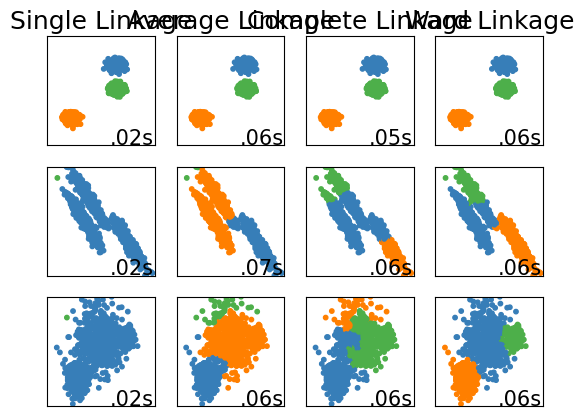

In [29]:
# Створення фігури для графіків
for i_dataset, (X, y, title) in enumerate(datasets):
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # Create cluster objects
    ward = cluster.AgglomerativeClustering(
        n_clusters=default_base["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=default_base["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=default_base["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=default_base["n_clusters"], linkage="single"
    )

    clustering_algorithms = [
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    ]

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

Single Linkage
ARI = 7.130131087540258e-06
AMI = 0.0011145549625215362
Average Linkage
ARI = 0.5371316613958722
AMI = 0.6358367120269245
Complete Linkage
ARI = 0.4691772914280986
AMI = 0.533228152857352
Ward Linkage
ARI = 0.9204990262126393
AMI = 0.8903617572475054


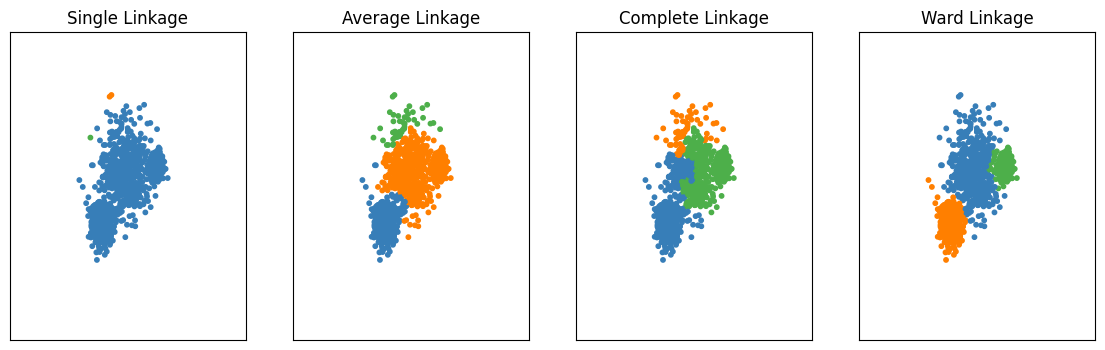

In [30]:
# Оцінка якості кластеризації для набору за якістю вина
plt.figure(figsize=(14, 4))

# Для іншого набору даних ("varied") використовуємо його відповідність (X_varied, y_varied)
X_varied = StandardScaler().fit_transform(varied[0])
y_varied = varied[1]

plot_num = 1

for name, algorithm in clustering_algorithms:
    algorithm.fit(X_varied)
    if hasattr(algorithm, "labels_"):
        y_pred_varied = algorithm.labels_.astype(int)
    else:
        y_pred_varied = algorithm.predict(X_varied)

    print(name)
    print("ARI =", adjusted_rand_score(y_varied, y_pred_varied))
    print("AMI =", adjusted_mutual_info_score(y_varied, y_pred_varied))

    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=12)

    colors = np.array(list(islice(cycle(["#377eb8", "#ff7f00", "#4daf4a"]), int(max(y_pred_varied) + 1))))
    plt.scatter(X_varied[:, 0], X_varied[:, 1], s=10, color=colors[y_pred_varied])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xticks(())
    plt.yticks(())

    plot_num += 1

plt.show()

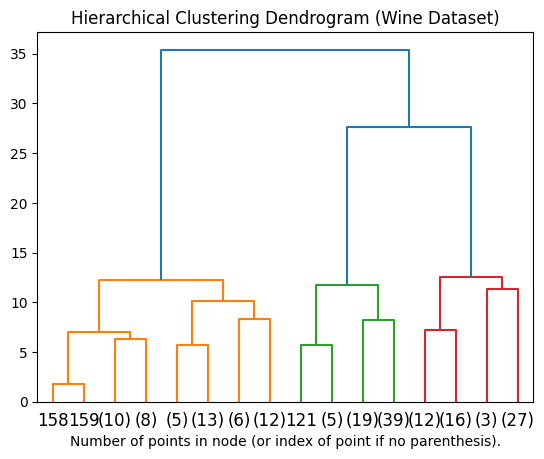

In [31]:
# Побудова дендрограми для набору за якістю вина
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

ward_wine_dendrogram = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="ward")
ward_wine_dendrogram.fit(X_wine)

plt.title("Hierarchical Clustering Dendrogram (Wine Dataset)")
plot_dendrogram(ward_wine_dendrogram, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [32]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import AgglomerativeClustering

wine = load_wine()
X = wine.data
Y = wine.target

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

wine_pred = model.fit_predict(X)

print("ARI =",adjusted_rand_score(Y, wine_pred))
print("AMI =",adjusted_mutual_info_score(Y, wine_pred))

ARI = 0.0
AMI = 2.6781460265881358e-14
